In [148]:
import os

import cv2
import numpy as np
import random as rng
import matplotlib.pyplot as plt

In [149]:
dataset = "D:\\Kevin\\Machine Learning\\Handwritten Character Recognition\\data\\sample"
forms = os.listdir(dataset)

In [150]:
form = cv2.imread(os.path.join(dataset, forms[0]))
form = cv2.cvtColor(form, cv2.COLOR_BGR2GRAY)

In [151]:
def save_image(x):
    cv2.imwrite(os.path.join(dataset, "new.png"), x)

In [10]:
size = 3

form = cv2.imread(os.path.join(dataset, forms[0]))
copy = form.copy()
form = cv2.cvtColor(form, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(form,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = form[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    ROI_number += 1


# form = cv2.imread(os.path.join(dataset, forms[0]))
# form = cv2.medianBlur(form, size)
# form = cv2.blur(form, (size, size))
# form = cv2.GaussianBlur(form, ksize=(25, 25), sigmaX = 11, sigmaY = 11)
# form = cv2.bilateralFilter(form, 9)
# kernel = np.ones((size, size), np.float32)
# kernel[size // 2][size // 2] = 0
# kernel /= kernel.sum()
# print(kernel)
# form = cv2.filter2D(form, -1, kernel)

# form = cv2.threshold(form.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_, form = cv2.threshold(form, 127, 255, cv2.THRESH_BINARY)
# form = cv2.adaptiveThreshold(form, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# form = cv2.adaptiveThreshold(form, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

print(form[0:5][0:5])

# kernel = np.ones((5, 5), np.uint8)
# form = cv2.erode(form, kernel, iterations = 1)
# form = cv2.dilate(form, kernel, iterations = 1)
# form = cv2.morphologyEx(form, cv2.MORPH_OPEN, kernel)

# x, y, w, h = cv2.boundingRect(form)
# form = cv2.rectangle(form,(x, y),(x + w, y + h), (0, 255, 0), 2)

# noise removal
# kernel = np.ones((3, 3), np.uint8)
# opening = cv2.morphologyEx(form, cv2.MORPH_OPEN, kernel, iterations = 2)

# # sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# # Finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)

# markers = cv2.watershed(form, markers)
# form[markers == -1] = [255,0,0]

# form = cv2.filter2D(form,-1,kernel)

contours, _ = cv2.findContours(form, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours)
for c in contours: 
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(form, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
#     rect = cv2.minAreaRect(c)
#     box = cv2.boxPoints(rect)
    
#     box = np.int0(box)
    
#     cv2.drawContours(form, [box], 0, (0, 0, 255))

#     (x, y), radius = cv2.minEnclosingCircle(c)
    
#     center = (int(x), int(y))
#     radius = int(radius)
    
#     form = cv2.circle(form, center, radius, (255, 0, 0), 2)

# print(len(contours))
# cv2.drawContours(form, contours, -1, (255, 255, 0), 1)

# cv2.imshow("contours", form)

# while True:
#     key = cv2.waitKey(1)
#     if key == 27: #ESC key to break
#         break

# cv2.destroyAllWindows()

save_image(form)

[[255 255 255 ... 255 255 255]
 [  0 255   0 ... 255 255 255]
 [255   0 255 ... 255 255 255]
 [255   0 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[array([[[   3, 3537]]], dtype=int32), array([[[   4, 3507]]], dtype=int32), array([[[   6, 3503]],

       [[   5, 3504]],

       [[   6, 3505]],

       [[   6, 3504]]], dtype=int32), array([[[   5, 3458]]], dtype=int32), array([[[   2, 3437]],

       [[   2, 3438]]], dtype=int32), array([[[   6, 3428]],

       [[   5, 3429]]], dtype=int32), array([[[   5, 3420]],

       [[   4, 3421]],

       [[   5, 3421]],

       [[   6, 3421]],

       [[   7, 3421]],

       [[   7, 3420]],

       [[   6, 3421]]], dtype=int32), array([[[   3, 3416]]], dtype=int32), array([[[   7, 3407]],

       [[   6, 3408]],

       [[   5, 3409]],

       [[   4, 3410]],

       [[   5, 3410]],

       [[   6, 3409]],

       [[   6, 3408]]], dtype=int32), array([[[   5, 3399]]], dtype=int32), array([[[   4, 3390]]], dtype=int32), array([[[   4, 33

In [27]:
size = 2

kernel = np.ones((size, size), np.float32)
kernel /= kernel.sum()
kernel

array([[0.25, 0.25],
       [0.25, 0.25]], dtype=float32)

In [18]:
cv2.THRESH_BINARY

0

In [22]:
cv2.THRESH_BINARY+cv2.THRESH_OTSU

8

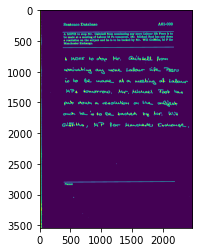

In [37]:
form = cv2.imread(os.path.join(dataset, forms[0]))
form = cv2.cvtColor(form, cv2.COLOR_BGR2RGB)

form = cv2.bilateralFilter(form, d = 7, sigmaSpace = 75, sigmaColor =75)
form = cv2.cvtColor(form, cv2.COLOR_RGB2GRAY)
a = form.max()  
_, form = cv2.threshold(form, a / 2 + 60, a, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(form, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
form_copy = form.copy()
final = cv2.drawContours(form_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(form_copy)
save_image(form)

In [37]:
import math
import cv2
import numpy as np


def wordSegmentation(img, kernelSize=25, sigma=11, theta=7, minArea=0):
	"""Scale space technique for word segmentation proposed by R. Manmatha: http://ciir.cs.umass.edu/pubfiles/mm-27.pdf
	
	Args:
		img: grayscale uint8 image of the text-line to be segmented.
		kernelSize: size of filter kernel, must be an odd integer.
		sigma: standard deviation of Gaussian function used for filter kernel.
		theta: approximated width/height ratio of words, filter function is distorted by this factor.
		minArea: ignore word candidates smaller than specified area.
		
	Returns:
		List of tuples. Each tuple contains the bounding box and the image of the segmented word.
	"""

	# apply filter kernel
	kernel = createKernel(kernelSize, sigma, theta)
	imgFiltered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
	(_, imgThres) = cv2.threshold(imgFiltered, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
	imgThres = 255 - imgThres

	# find connected components. OpenCV: return type differs between OpenCV2 and 3
	if cv2.__version__.startswith('3.'):
		(_, components, _) = cv2.findContours(imgThres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	else:
		(components, _) = cv2.findContours(imgThres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

	# append components to result
	res = []
	for c in components:
		# skip small word candidates
		if cv2.contourArea(c) < minArea:
			continue
		# append bounding box and image of word to result list
		currBox = cv2.boundingRect(c) # returns (x, y, w, h)
		(x, y, w, h) = currBox
		currImg = img[y:y+h, x:x+w]
		res.append((currBox, currImg))

	# return list of words, sorted by x-coordinate
	return sorted(res, key=lambda entry:(entry[0][1], entry[0][0]))


def prepareImg(img, height):
	"""convert given image to grayscale image (if needed) and resize to desired height"""
	assert img.ndim in (2, 3)
	if img.ndim == 3:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	h = img.shape[0]
	factor = height / h
	return cv2.resize(img, dsize=None, fx=factor, fy=factor)


def createKernel(kernelSize, sigma, theta):
	"""create anisotropic filter kernel according to given parameters"""
	assert kernelSize % 2 # must be odd size
	halfSize = kernelSize // 2
	
	kernel = np.zeros([kernelSize, kernelSize])
	sigmaX = sigma
	sigmaY = sigma * theta
	
	for i in range(kernelSize):
		for j in range(kernelSize):
			x = i - halfSize
			y = j - halfSize
			
			expTerm = np.exp(-x**2 / (2 * sigmaX) - y**2 / (2 * sigmaY))
			xTerm = (x**2 - sigmaX**2) / (2 * math.pi * sigmaX**5 * sigmaY)
			yTerm = (y**2 - sigmaY**2) / (2 * math.pi * sigmaY**5 * sigmaX)
			
			kernel[i, j] = (xTerm + yTerm) * expTerm

	kernel = kernel / np.sum(kernel)
	return kernel

In [38]:
form = prepareImg(form, form.shape[0])
res = wordSegmentation(form)
res

[((0, 0, 44, 3542),
  array([[142, 150, 137, ..., 236, 240, 238],
         [127, 129, 116, ..., 236, 239, 240],
         [134, 114, 128, ..., 239, 240, 244],
         ...,
         [ 94, 106, 107, ..., 220, 198, 193],
         [100, 107,  98, ..., 202, 196, 191],
         [103,  93,  86, ..., 203, 199, 200]], dtype=uint8)),
 ((1910, 206, 245, 44),
  array([[251, 251, 251, ..., 251, 251, 251],
         [251, 251, 251, ..., 250, 250, 251],
         [251, 251, 251, ..., 250, 250, 250],
         ...,
         [249, 243, 196, ..., 249, 250, 251],
         [251, 248, 246, ..., 251, 251, 251],
         [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)),
 ((657, 209, 275, 48),
  array([[251, 251, 251, ..., 251, 251, 251],
         [251, 250, 250, ..., 251, 251, 251],
         [249, 249, 241, ..., 251, 251, 251],
         ...,
         [250, 248, 241, ..., 251, 251, 251],
         [251, 249, 244, ..., 251, 251, 251],
         [250, 248, 250, ..., 251, 251, 251]], dtype=uint8)),
 ((379, 212, 26

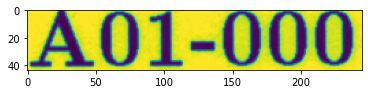

In [41]:
plt.imshow(res[1][1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


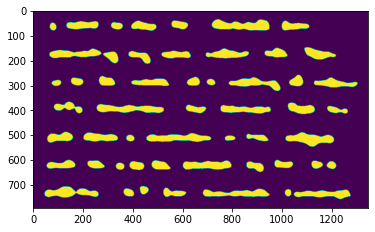

In [260]:
original = cv2.imread(os.path.join(dataset, forms[0]))
form = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
form = cv2.GaussianBlur(form, ksize=(49, 49), sigmaX = 11, sigmaY = 11)
ret, form = cv2.threshold(form, 215, 255, cv2.THRESH_BINARY)
form = 255 - form
# form = (form >= 215).astype("float")
# # form = prepareImg(form, form.shape[0])
# # form.
plt.imshow(form)
save_image(form)
print(form)

In [261]:
num_labels, labels_im = cv2.connectedComponents(form)

In [262]:
num_labels

54

In [263]:
labels_im

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [264]:
# Map component labels to hue val
label_hue = np.uint8(179*labels_im/np.max(labels_im))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

save_image(labeled_img)
# cv2.imshow('labeled.png', labeled_img)
# cv2.waitKey()

In [265]:
min_x = {}
max_x = {}
min_y = {}
max_y = {}

for i in range(labels_im.shape[0]):
    for j in range(labels_im.shape[1]):
        if not labels_im[i][j] == 0:
            if labels_im[i][j] not in min_x.keys():
                min_x[labels_im[i][j]] = i
                max_x[labels_im[i][j]] = i
                min_y[labels_im[i][j]] = j
                max_y[labels_im[i][j]] = j
            else:
                min_x[labels_im[i][j]] = min(min_x[labels_im[i][j]], i)
                max_x[labels_im[i][j]] = max(max_x[labels_im[i][j]], i)
                min_y[labels_im[i][j]] = min(min_y[labels_im[i][j]], j)
                max_y[labels_im[i][j]] = max(max_y[labels_im[i][j]], j)

In [269]:
bounding_boxes = []
for i in range(1, len(min_x.keys()) + 1):
    bounding_boxes.append((min_x[i], max_x[i], min_y[i], max_y[i]))

In [270]:
print(len(min_x.keys()) + 1)

54


In [271]:
bounding_boxes

[(33, 77, 719, 950),
 (39, 78, 395, 495),
 (38, 72, 557, 622),
 (39, 77, 1000, 1110),
 (41, 72, 134, 263),
 (45, 73, 314, 360),
 (47, 77, 67, 93),
 (145, 194, 1091, 1217),
 (148, 185, 931, 1022),
 (151, 188, 66, 274),
 (150, 189, 695, 867),
 (161, 211, 384, 472),
 (160, 189, 517, 633),
 (163, 209, 282, 342),
 (257, 301, 1030, 1085),
 (261, 299, 265, 329),
 (265, 299, 619, 670),
 (266, 320, 787, 994),
 (267, 307, 1130, 1304),
 (268, 298, 153, 201),
 (272, 300, 395, 546),
 (273, 297, 699, 732),
 (277, 300, 75, 112),
 (365, 410, 84, 198),
 (368, 413, 1025, 1133),
 (374, 409, 256, 525),
 (377, 410, 615, 695),
 (378, 411, 754, 955),
 (382, 411, 1183, 1265),
 (486, 528, 57, 160),
 (487, 545, 1015, 1209),
 (488, 524, 203, 341),
 (491, 525, 456, 715),
 (494, 522, 858, 946),
 (498, 523, 375, 407),
 (500, 520, 772, 813),
 (598, 633, 55, 169),
 (599, 630, 971, 1044),
 (601, 632, 219, 287),
 (600, 636, 477, 552),
 (601, 636, 603, 797),
 (602, 633, 1120, 1165),
 (604, 638, 388, 446),
 (605, 646, 85

In [272]:
for box in bounding_boxes:
    a, b, c, d = box
    original[a, c:d] = 0
    original[b, c:d] = 0
    print(form.shape)
    print(a, b, c)
    original[a:b, c] = 0
    original[a:b, d] = 0

(792, 1347)
33 77 719
(792, 1347)
39 78 395
(792, 1347)
38 72 557
(792, 1347)
39 77 1000
(792, 1347)
41 72 134
(792, 1347)
45 73 314
(792, 1347)
47 77 67
(792, 1347)
145 194 1091
(792, 1347)
148 185 931
(792, 1347)
151 188 66
(792, 1347)
150 189 695
(792, 1347)
161 211 384
(792, 1347)
160 189 517
(792, 1347)
163 209 282
(792, 1347)
257 301 1030
(792, 1347)
261 299 265
(792, 1347)
265 299 619
(792, 1347)
266 320 787
(792, 1347)
267 307 1130
(792, 1347)
268 298 153
(792, 1347)
272 300 395
(792, 1347)
273 297 699
(792, 1347)
277 300 75
(792, 1347)
365 410 84
(792, 1347)
368 413 1025
(792, 1347)
374 409 256
(792, 1347)
377 410 615
(792, 1347)
378 411 754
(792, 1347)
382 411 1183
(792, 1347)
486 528 57
(792, 1347)
487 545 1015
(792, 1347)
488 524 203
(792, 1347)
491 525 456
(792, 1347)
494 522 858
(792, 1347)
498 523 375
(792, 1347)
500 520 772
(792, 1347)
598 633 55
(792, 1347)
599 630 971
(792, 1347)
601 632 219
(792, 1347)
600 636 477
(792, 1347)
601 636 603
(792, 1347)
602 633 1120
(792

In [273]:
save_image(original)

In [274]:
form.shape

(792, 1347)

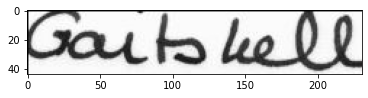

In [275]:
plt.imshow(original[bounding_boxes[0][0]:bounding_boxes[0][1], bounding_boxes[0][2]:bounding_boxes[0][3]])

In [276]:
bounding_boxes = sorted(bounding_boxes, key = lambda entry: entry[0])
bounding_boxes

[(33, 77, 719, 950),
 (38, 72, 557, 622),
 (39, 78, 395, 495),
 (39, 77, 1000, 1110),
 (41, 72, 134, 263),
 (45, 73, 314, 360),
 (47, 77, 67, 93),
 (145, 194, 1091, 1217),
 (148, 185, 931, 1022),
 (150, 189, 695, 867),
 (151, 188, 66, 274),
 (160, 189, 517, 633),
 (161, 211, 384, 472),
 (163, 209, 282, 342),
 (257, 301, 1030, 1085),
 (261, 299, 265, 329),
 (265, 299, 619, 670),
 (266, 320, 787, 994),
 (267, 307, 1130, 1304),
 (268, 298, 153, 201),
 (272, 300, 395, 546),
 (273, 297, 699, 732),
 (277, 300, 75, 112),
 (365, 410, 84, 198),
 (368, 413, 1025, 1133),
 (374, 409, 256, 525),
 (377, 410, 615, 695),
 (378, 411, 754, 955),
 (382, 411, 1183, 1265),
 (486, 528, 57, 160),
 (487, 545, 1015, 1209),
 (488, 524, 203, 341),
 (491, 525, 456, 715),
 (494, 522, 858, 946),
 (498, 523, 375, 407),
 (500, 520, 772, 813),
 (598, 633, 55, 169),
 (599, 630, 971, 1044),
 (600, 636, 477, 552),
 (601, 632, 219, 287),
 (601, 636, 603, 797),
 (602, 633, 1120, 1165),
 (604, 638, 388, 446),
 (604, 634, 11

In [280]:
current_window_min = -1
current_window_max = -1
current_window_str = -1

for i in range(len(bounding_boxes)):
    if current_window_str == -1:
        current_window_min = bounding_boxes[i][0]
        current_window_max = bounding_boxes[i][1]
        current_window_str = i
        continue
    print(bounding_boxes[i][0], current_window_min, current_window_max)
    if (i == len(bounding_boxes) - 1) or (not ((bounding_boxes[i][0] >= current_window_min and bounding_boxes[i][0] <= current_window_max) or (bounding_boxes[i][1] >= current_window_min and bounding_boxes[i][1] <= current_window_max))):
        if i == len(bounding_boxes) - 1:
            i = i + 1
        bounding_boxes[current_window_str:i] = sorted(bounding_boxes[current_window_str:i], key = lambda entry: entry[2])
        if i == len(bounding_boxes):
            i = i - 1
        current_window_min = bounding_boxes[i][0]
        current_window_max = bounding_boxes[i][1]
        current_window_str = i
        print(i)
    if (bounding_boxes[i][0] >= current_window_min and bounding_boxes[i][0] <= current_window_max) or (bounding_boxes[i][1] >= current_window_min and bounding_boxes[i][1] <= current_window_max):
        current_window_min = min(current_window_min, bounding_boxes[i][0])
        current_window_max = min(current_window_max, bounding_boxes[i][1])
    

41 47 77
45 41 72
39 41 72
3
38 39 78
33 38 72
5
39 33 77
151 33 77
7
163 151 188
161 151 188
160 151 188
150 151 188
11
148 150 189
145 148 185
13
277 145 194
14
268 277 300
261 268 298
16
272 261 299
265 261 299
273 261 299
266 261 297
257 261 297
21
267 257 301
365 257 301
23
374 365 410
377 365 409
378 365 409
368 365 409
382 365 409
486 365 409
29
488 486 528
498 486 524
491 486 523
500 486 523
494 486 520
487 486 520
598 486 520
36
601 598 633
610 598 632
604 598 632
600 598 632
601 598 632
605 598 632
599 598 632
602 598 630
604 598 630
705 598 630
46
713 705 749
704 705 744
711 704 736
715 704 736
716 704 736
718 704 736
52


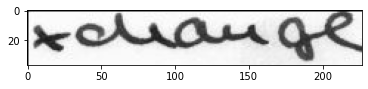

In [286]:
i = 52
plt.imshow(original[bounding_boxes[i][0]:bounding_boxes[i][1], bounding_boxes[i][2]:bounding_boxes[i][3]])

In [289]:
segments = []
for i in range(len(bounding_boxes)):
    segments.append(original[bounding_boxes[i][0]:bounding_boxes[i][1], bounding_boxes[i][2]:bounding_boxes[i][3]])

segments[0].shape

(30, 26, 3)

In [3]:
import cv2
from text_segmentation import segmentImage
from Image2Text.eval import evaluate

image_path = "../data/sample/a00-000u.png"
image = cv2.imread(image_path)

segments = segmentImage(image)

ModuleNotFoundError: No module named 'Image2Text'